# 1. Install Dependencies

In [ ]:
!pip install pycocotools

In [12]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycocotools.coco import COCO


In [14]:
# Define file paths
ANNOTATION_FILE = 'annotation_subset/instances_train2017_subset.json'
IMAGE_FOLDER = 'train2017'


# 2. Load COCO Annotations

In [16]:
coco = COCO(ANNOTATION_FILE)

loading annotations into memory...
Done (t=4.51s)
creating index...
index created!


#  Basic Dataset Overview
## (a) Check Total Images, Annotations, and Categories

In [18]:
print(f"Total Images: {len(coco.imgs)}")
print(f"Total Annotations: {len(coco.anns)}")
print(f"Total Categories: {len(coco.cats)}")


Total Images: 29571
Total Annotations: 212806
Total Categories: 80


## (b) List All Categories

In [20]:
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]
print("Categories:", category_names)


Categories: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


## (c) Count Annotations per Category

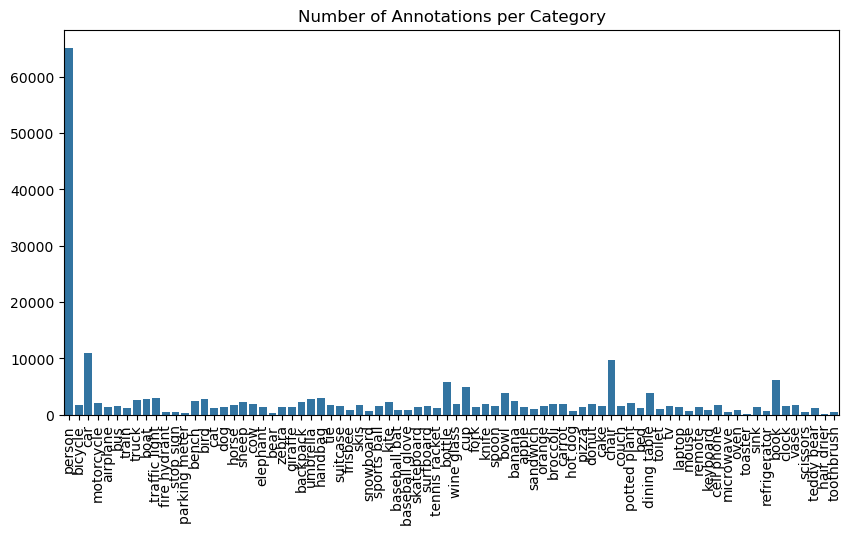

In [22]:
category_counts = {cat['name']: len(coco.getAnnIds(catIds=cat['id'])) for cat in categories}
plt.figure(figsize=(10,5))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.xticks(rotation=90)
plt.title("Number of Annotations per Category")
plt.show()


# 4. Visualizing Sample Images with Annotations
## (a) Load and Display a Random Image with Annotations

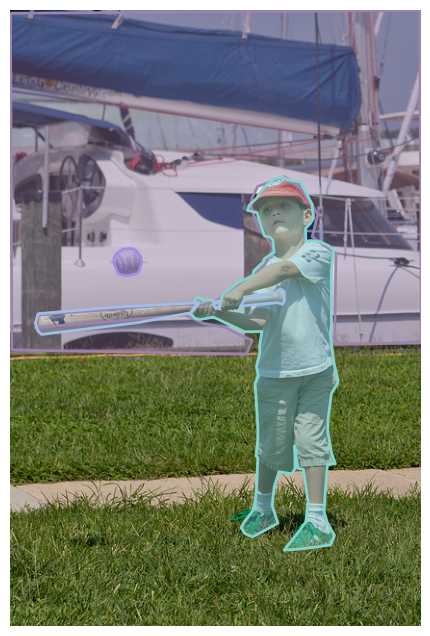

In [28]:
def show_image_with_annotations(image_id):
    image_info = coco.loadImgs([image_id])[0]  # Pass as a list
    image_path = os.path.join(IMAGE_FOLDER, image_info['file_name'])  # Fix file name key

    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get annotations
    ann_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(ann_ids)

    # Plot image
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')

    # Overlay annotations
    coco.showAnns(annotations)
    plt.show()

# Show a random image
random_image_id = np.random.choice(list(coco.imgs.keys()))  # Ensure valid ID
show_image_with_annotations(random_image_id)


# 5. Distribution of Bounding Box Sizes

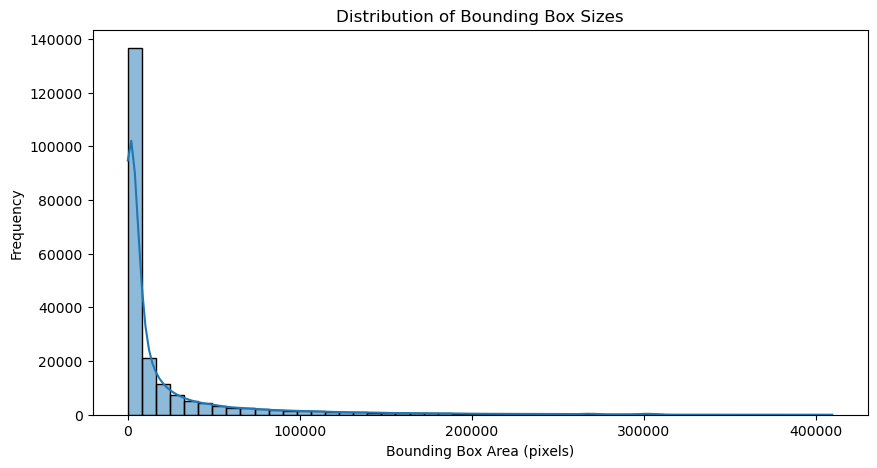

In [30]:
bbox_sizes = [ann['bbox'][2] * ann['bbox'][3] for ann in coco.anns.values()]
plt.figure(figsize=(10,5))
sns.histplot(bbox_sizes, bins=50, kde=True)
plt.xlabel("Bounding Box Area (pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Bounding Box Sizes")
plt.show()


# 6. Image-wise Annotation Count

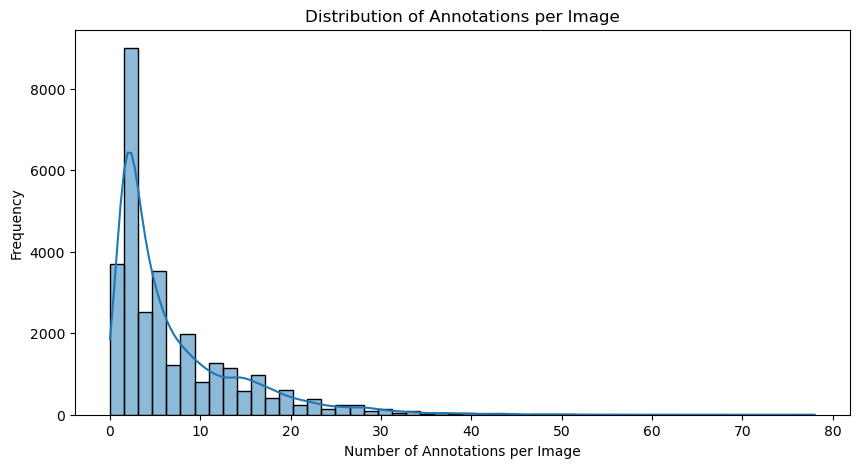

In [32]:
image_ann_counts = [len(coco.getAnnIds(imgIds=img_id)) for img_id in coco.imgs.keys()]
plt.figure(figsize=(10,5))
sns.histplot(image_ann_counts, bins=50, kde=True)
plt.xlabel("Number of Annotations per Image")
plt.ylabel("Frequency")
plt.title("Distribution of Annotations per Image")
plt.show()


# 7. Export EDA Results to JSON

In [35]:
eda_results = {
    "total_images": len(coco.imgs),
    "total_annotations": len(coco.anns),
    "total_categories": len(coco.cats),
    "category_distribution": category_counts,
}

# Save as JSON file
with open("coco_eda_results.json", "w") as f:
    json.dump(eda_results, f, indent=4)

print("EDA results saved to coco_eda_results.json")


EDA results saved to coco_eda_results.json
